In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import OrdinalEncoder

In [99]:
train = pd.read_csv('data\\train.csv')
print(train.shape)
train.head(15)

(54706, 14)


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
5,2,10011,270344397,L,MLO,55.0,0,0,0,0.0,0,NaN,21,True
6,2,10011,541722628,R,CC,55.0,0,0,0,NaN,0,NaN,21,False
7,2,10011,1031443799,R,MLO,55.0,0,0,0,NaN,0,NaN,21,False
8,2,10025,562340703,L,CC,75.0,0,0,0,NaN,0,NaN,29,False
9,2,10025,1365269360,L,MLO,75.0,0,0,0,NaN,0,NaN,29,False


In [100]:
lines = ['Data Value Counts']
with open('data_description.txt', 'w') as f:
    for line in lines:
        f.write(line)
        f.write('\n')
    for column in ['site_id','laterality','view','age','cancer','biopsy','BIRADS','implant','density','machine_id','difficult_negative_case']:
        print(train[column].value_counts(), file=f)
        print('', file=f)

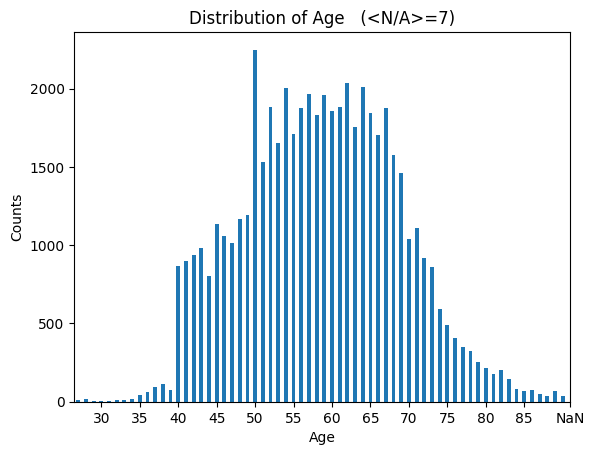

In [101]:
na_s = train.loc[:,'age'].value_counts(sort=False, dropna = False).values[-1]
ax = train.loc[:,'age'][::].sort_values().value_counts(sort=False,dropna=False).plot(kind='bar',
                                                                        rot=0,
                                                                        xlabel='Age',
                                                                        ylabel='Counts',
                                                                        title=f'Distribution of Age   (<N/A>={na_s})')
ticks = ax.xaxis.get_ticklocs()[:63]
ticklabels = [np.int64(np.float64(l.get_text())) for l in ax.xaxis.get_ticklabels()[:63]]
ticks = np.append(ticks,64)
ticklabels = np.append(ticklabels,'NaN')
ax.xaxis.set_ticks(ticks[3:64:5])
ax.xaxis.set_ticklabels(ticklabels[3:64:5])
plt.show()

In [102]:
train[['site_id','implant','density']].value_counts(dropna=False)

site_id  implant  density
2        0        NaN        25187
1        0        B          12194
                  C          11319
                  A           3022
                  D           1475
         1        C            856
                  B            457
                  A             83
                  D             64
         0        NaN           32
         1        NaN           17
dtype: int64

In [103]:
density_map = {pd.NA:-1,'A':0,'B':1,'C':2,'D':3}
train['density'] = train['density'].map(density_map)
diff_case_map = {True:1,False:0}
train['difficult_negative_case'] = train['difficult_negative_case'].map(diff_case_map)

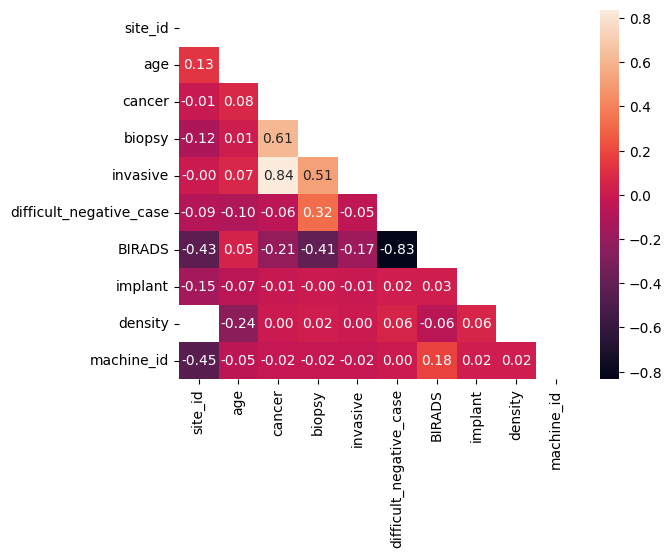

In [104]:
numerical = train[['site_id','age','cancer','biopsy','invasive','difficult_negative_case','BIRADS','implant','density','machine_id']]
corr_matrix = numerical.corr()
mask = np.triu(corr_matrix)
sn.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap=)
plt.show()

In [110]:
print(train[['BIRADS','cancer']].value_counts(normalize=True))
print(train[['BIRADS','biopsy','invasive']].value_counts(normalize=True))

BIRADS  cancer
1.0     0         0.600015
0.0     0         0.288557
2.0     0         0.086168
0.0     1         0.025261
dtype: float64
BIRADS  biopsy  invasive
1.0     0       0           0.600015
0.0     0       0           0.224226
2.0     0       0           0.086168
0.0     1       0           0.072472
                1           0.017119
dtype: float64
